In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [125]:
df1 = pd.read_csv("Bitcoin Energy Consumption.csv", header=0)
df2 = pd.read_csv("Carbon Footprint Generated by Bitcoin.csv", header=0)
df3 = pd.read_csv("Bitcoin Hash Rate.csv", header=0)
df4 = pd.read_csv("Bitcoin Trade Volume & Price.csv", header=0)

# Date Formatting

## Bitcoin Energy Consumption

In [126]:
df1.head()

,Timestamp,Date and Time,"power MAX, GW","power MIN, GW","power GUESS, GW","annualised consumption MAX, TWh","annualised consumption MIN, TWh","annualised consumption GUESS, TWh"
0,1279411200,2010-07-18T00:00:00,0.000027,0.000022,0.000024,0.000234,0.000197,0.000214
1,1279497600,2010-07-19T00:00:00,0.000027,0.000023,0.000025,0.000235,0.000198,0.000215
2,1279584000,2010-07-20T00:00:00,0.000027,0.000023,0.000025,0.000239,0.000201,0.000219
3,1279670400,2010-07-21T00:00:00,0.000028,0.000024,0.000026,0.000249,0.000210,0.000229
4,1279756800,2010-07-22T00:00:00,0.000028,0.000024,0.000026,0.000247,0.000208,0.000227


In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Timestamp                          4335 non-null   int64  
 1   Date and Time                      4335 non-null   object 
 2   power MAX, GW                      4335 non-null   float64
 3   power MIN, GW                      4335 non-null   float64
 4   power GUESS, GW                    4335 non-null   float64
 5   annualised consumption MAX, TWh    4335 non-null   float64
 6   annualised consumption MIN, TWh    4335 non-null   float64
 7   annualised consumption GUESS, TWh  4335 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 271.1+ KB


In [128]:
# drop irrelevant columns
df1.drop('Timestamp', axis=1, inplace=True) 
df1.drop('power MAX, GW', axis=1, inplace=True)
df1.drop('power MIN, GW', axis=1, inplace=True)
df1.drop('power GUESS, GW', axis=1, inplace=True) 
df1.drop('annualised consumption MAX, TWh', axis=1, inplace=True) 
df1.drop('annualised consumption MIN, TWh', axis=1, inplace=True) 

df1["Date and Time"] = pd.to_datetime(df1["Date and Time"]) # change datetime to date

# rename columns
df1.rename(columns = {'Date and Time':'Date'}, inplace = True)
df1.rename(columns = {'annualised consumption GUESS, TWh':'Energy Consumption (TWh)'}, inplace = True)

threshhold = len(df1.index)*0.7
df1.dropna(axis=1, thresh=threshhold, inplace=True)
df1.dropna(inplace=True)
df1.head()

,Date,Energy Consumption (TWh)
0,2010-07-18,0.000214
1,2010-07-19,0.000215
2,2010-07-20,0.000219
3,2010-07-21,0.000229
4,2010-07-22,0.000227


In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4335 entries, 0 to 4334
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      4335 non-null   datetime64[ns]
 1   Energy Consumption (TWh)  4335 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 101.6 KB


## Carbon Footprint Generated by Bitcoin

In [130]:
df2.head()

,Date,BTCENEMAX,BTCENEMIN,BTCENEGUE,BTCEMI_MAX,BTCEMI_MIN,BTCEMI_GUE,BTCOAL_MAX,BTCOAL_MIN,BTCOAL_GUE,BTCOIL_MAX,BTCOIL_MIN,BTCOIL_GUE,BTCGAS_MAX,BTCGAS_MIN,BTCGAS_GUE
0,7/18/2010,1632822.0,137429.2,823214.3,904583.3,76135.76,456060.7,1663845.0,140040.3,838855.4,1394430.0,117364.5,703025.0,839270.4,70638.59,423132.2
1,7/19/2010,1642310.0,138227.8,827998.0,909839.8,76578.18,458710.9,1673514.0,140854.1,843729.9,1402533.0,118046.5,707110.3,844147.4,71049.07,425591.0
2,7/20/2010,1667626.0,140358.5,840761.6,923864.9,77758.63,465781.9,1699311.0,143025.4,856736.1,1424153.0,119866.2,718010.4,857159.9,72144.30,432151.5
3,7/21/2010,1741990.0,146617.5,878253.3,965062.4,81226.09,486552.3,1775088.0,149403.2,894940.1,1487660.0,125211.3,750028.3,895382.9,75361.40,451422.2
4,7/22/2010,1727749.0,145418.9,871073.5,957173.0,80562.06,482574.7,1760576.0,148181.8,887623.9,1475498.0,124187.7,743896.8,888063.1,74745.31,447731.8


In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4158 non-null   object 
 1   BTCENEMAX   4158 non-null   float64
 2   BTCENEMIN   4158 non-null   float64
 3   BTCENEGUE   4158 non-null   float64
 4   BTCEMI_MAX  4158 non-null   float64
 5   BTCEMI_MIN  4158 non-null   float64
 6   BTCEMI_GUE  4158 non-null   float64
 7   BTCOAL_MAX  4158 non-null   float64
 8   BTCOAL_MIN  4158 non-null   float64
 9   BTCOAL_GUE  4158 non-null   float64
 10  BTCOIL_MAX  4158 non-null   float64
 11  BTCOIL_MIN  4158 non-null   float64
 12  BTCOIL_GUE  4158 non-null   float64
 13  BTCGAS_MAX  4158 non-null   float64
 14  BTCGAS_MIN  4158 non-null   float64
 15  BTCGAS_GUE  4158 non-null   float64
dtypes: float64(15), object(1)
memory usage: 519.9+ KB


In [132]:
df2["Date"] = pd.to_datetime(df2["Date"]) # change datetime to date
df2 = df2[["Date", "BTCEMI_GUE"]]

df2.rename(columns = {'BTCEMI_GUE':'Carbon Footprint (kgC02)'}, inplace = True) # rename column

threshhold = len(df2.index)*0.7
df2.dropna(axis=1, thresh=threshhold, inplace=True)
df2.dropna(inplace=True)
df2.head()

,Date,Carbon Footprint (kgC02)
0,2010-07-18,456060.7
1,2010-07-19,458710.9
2,2010-07-20,465781.9
3,2010-07-21,486552.3
4,2010-07-22,482574.7


In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4158 entries, 0 to 4157
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      4158 non-null   datetime64[ns]
 1   Carbon Footprint (kgC02)  4158 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 97.5 KB


# Bitcoin Hash Rate

In [134]:
df3.head()

,Date,Value
0,2022-05-30,2.288761e+08
1,2022-05-29,2.214450e+08
2,2022-05-28,2.199588e+08
3,2022-05-27,2.050967e+08
4,2022-05-26,2.095554e+08


In [135]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4896 non-null   object 
 1   Value   4896 non-null   float64
dtypes: float64(1), object(1)
memory usage: 76.6+ KB


In [136]:
df3["Date"] = pd.to_datetime(df3["Date"])
threshhold = len(df3.index)*0.7

df3.rename(columns = {'Value':'Hash Rate (Tera Hashes/s)'}, inplace = True) # rename column

df3.dropna(axis=1, thresh=threshhold, inplace=True)
df3.dropna(inplace=True)
df3.head()

,Date,Hash Rate (Tera Hashes/s)
0,2022-05-30,2.288761e+08
1,2022-05-29,2.214450e+08
2,2022-05-28,2.199588e+08
3,2022-05-27,2.050967e+08
4,2022-05-26,2.095554e+08


In [137]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4896 entries, 0 to 4895
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       4896 non-null   datetime64[ns]
 1   Hash Rate (Tera Hashes/s)  4896 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 114.8 KB


## Bitcoin Trade Volume & Price

In [138]:
df4.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [140]:
# drop irrelevant columns
df4.drop('Open', axis=1, inplace=True) 
df4.drop('High', axis=1, inplace=True)
df4.drop('Low', axis=1, inplace=True)
df4.drop('Close', axis=1, inplace=True) 
df4.drop('Volume_(Currency)', axis=1, inplace=True) 
df4.drop('Weighted_Price', axis=1, inplace=True) 

df4.rename(columns = {'Volume_(BTC)':'Volume'}, inplace = True) # rename column

# convert unix timestamp to datetime
df4['Timestamp'] = pd.to_datetime(df4['Timestamp'], unit="s")
df4.rename(columns = {'Timestamp':'Date'}, inplace = True)
threshhold = len(df4.index)*0.7
df4.dropna(axis=1, thresh=threshhold, inplace=True)
df4.dropna(inplace=True)
df4.head()

,Date,Volume
0,2011-12-31 07:52:00,0.455581
478,2011-12-31 15:50:00,48.000000
547,2011-12-31 16:59:00,37.862297
548,2011-12-31 17:00:00,9.000000
1224,2012-01-01 04:16:00,1.502000


In [141]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Volume  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 82.7 MB


In [142]:
# remove time
df4["Date"] = df4["Date"].dt.normalize()
df4.head()

,Date,Volume
0,2011-12-31,0.455581
478,2011-12-31,48.000000
547,2011-12-31,37.862297
548,2011-12-31,9.000000
1224,2012-01-01,1.502000


In [153]:
# remove duplicate dates and get the sum of the volume for each day
df4 = df4.groupby(df4["Date"])["Volume"].sum().reset_index()
df4.head()

,Date,Volume
0,2011-12-31,95.317878
1,2012-01-01,21.602000
2,2012-01-02,19.048000
3,2012-01-03,88.037281
4,2012-01-04,107.233260


In [154]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3376 non-null   datetime64[ns]
 1   Volume  3376 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.9 KB


# Join DF

In [155]:
df12 = df1.join(df2.set_index('Date'), on="Date", sort="True", lsuffix="df1", rsuffix="df2")
threshhold = len(df12.index)*0.7
df12.dropna(axis=1, thresh=threshhold, inplace=True)
df12.dropna(inplace=True)
df12

,Date,Energy Consumption (TWh),Carbon Footprint (kgC02)
0,2010-07-18,0.000214,4.560607e+05
1,2010-07-19,0.000215,4.587109e+05
2,2010-07-20,0.000219,4.657819e+05
3,2010-07-21,0.000229,4.865523e+05
4,2010-07-22,0.000227,4.825747e+05
...,...,...,...
4160,2021-12-07,124.002878,3.740000e+10
4161,2021-12-08,126.633318,4.520000e+10
4162,2021-12-09,126.712542,5.330000e+10
4163,2021-12-10,124.586531,5.510000e+10


In [156]:
df123 = df12.join(df3.set_index('Date'), on="Date", sort="True", lsuffix="df12", rsuffix="df3")
threshhold = len(df123.index)*0.7
df123.dropna(axis=1, thresh=threshhold, inplace=True)
df123.dropna(inplace=True)
df123

,Date,Energy Consumption (TWh),Carbon Footprint (kgC02),Hash Rate (Tera Hashes/s)
0,2010-07-18,0.000214,4.560607e+05,1.615397e-03
1,2010-07-19,0.000215,4.587109e+05,1.606373e-03
2,2010-07-20,0.000219,4.657819e+05,1.822962e-03
3,2010-07-21,0.000229,4.865523e+05,1.822962e-03
4,2010-07-22,0.000227,4.825747e+05,1.750766e-03
...,...,...,...,...
4160,2021-12-07,124.002878,3.740000e+10,1.709880e+08
4161,2021-12-08,126.633318,4.520000e+10,1.865324e+08
4162,2021-12-09,126.712542,5.330000e+10,1.809808e+08
4163,2021-12-10,124.586531,5.510000e+10,1.732086e+08


In [157]:
df = df123.join(df4.set_index('Date'), on="Date", sort="True", lsuffix="df", rsuffix="df4")
threshhold = len(df.index)*0.7
df.dropna(axis=1, thresh=threshhold, inplace=True)
df.dropna(inplace=True)
df

,Date,Energy Consumption (TWh),Carbon Footprint (kgC02),Hash Rate (Tera Hashes/s),Volume
531,2011-12-31,0.066053,2.620000e+07,9.283326e+00,95.317878
532,2012-01-01,0.064814,2.570000e+07,8.764382e+00,21.602000
533,2012-01-02,0.063259,2.880000e+07,9.340986e+00,19.048000
534,2012-01-03,0.064114,3.180000e+07,9.340986e+00,88.037281
535,2012-01-04,0.063748,3.480000e+07,8.476080e+00,107.233260
...,...,...,...,...,...
3905,2021-03-27,129.445668,6.700000e+10,1.728239e+08,2609.967580
3906,2021-03-28,129.808958,6.720000e+10,1.728239e+08,2073.449191
3907,2021-03-29,129.808958,6.720000e+10,1.641284e+08,5360.425663
3908,2021-03-30,127.992617,6.620000e+10,1.586936e+08,3392.338619


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 531 to 3909
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3376 non-null   datetime64[ns]
 1   Energy Consumption (TWh)   3376 non-null   float64       
 2   Carbon Footprint (kgC02)   3376 non-null   float64       
 3   Hash Rate (Tera Hashes/s)  3376 non-null   float64       
 4   Volume                     3376 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 158.2 KB


# Regression

In [172]:
feature_cols = df[df.columns.difference(["Carbon Footprint (kgC02)", "Date"])].columns.values
X = df[feature_cols]
y = df['Carbon Footprint (kgC02)']

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

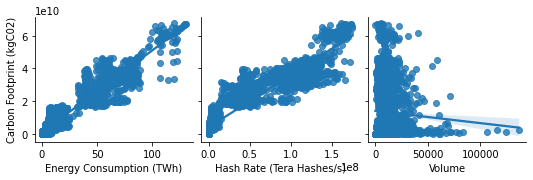

In [174]:
sns.pairplot(df, x_vars=feature_cols, y_vars='Carbon Footprint (kgC02)', kind='reg')

In [175]:
np.sqrt(metrics.mean_squared_error(y, y_pred))

3490083570.977236

In [178]:
feature_cols = df123[df123.columns.difference(["Carbon Footprint (kgC02)", "Date"])].columns.values
X = df123[feature_cols]
y = df123['Carbon Footprint (kgC02)']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3717759790.8152175